# Kurzer Überblick über ausgewählte Funktionen in OpenCV

Tutorial mit Überblick über Funktionen: 

[https://docs.opencv.org/3.4/d6/d00/tutorial_py_root.html](https://docs.opencv.org/3.4/d6/d00/tutorial_py_root.html) (Schwerpunkte Core Operations, Image Processing in OpenCV)

In [1]:
import numpy as np
import cv2 as cv
import sys
sys.version

'3.9.4 (tags/v3.9.4:1f2e308, Apr  6 2021, 13:40:21) [MSC v.1928 64 bit (AMD64)]'

# Bilder laden und anzeigen
`cv.imread, cv.imwrite, cv.imshow, cv.waitkey, cv.destroyWindows, matplotlib.imshow`

In [51]:
# Laden eines Bildes
# -----------------------------------
pfile='PiCar.jpg'
#pfile='PiCar_leichte_Kurve.jpg'
#pfile='PiCar_mittlere_Kurve.jpg'
#pfile='PiCar_starke_Kurve.jpg'
# -----------------------------------
img = cv.imread(pfile) # Gibt einen Numpy-Array zurück mit den Farbkanälen (Blau,Grün,Rot)
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(1944, 2592, 3)


#### Resize

(1944, 2592, 3)
(324, 432, 3)


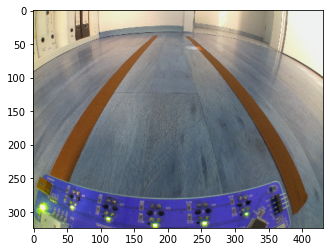

In [6]:
print(img.shape)
height, width, _ = img.shape

#image_small_2 = cv.resize(img_rgb,(2592, 1944), interpolation = cv.INTER_CUBIC)
#image_small_2 = cv.resize(img_rgb,(1296, 972), interpolation = cv.INTER_CUBIC)
#image_small_2 = cv.resize(img_rgb,(648, 486), interpolation = cv.INTER_CUBIC)
image_small_2 = cv.resize(img,(432, 324), interpolation = cv.INTER_CUBIC)

print(image_small_2.shape)
plt.imshow(image_small_2)

#### BGR / RGB

Text(0.5, 0, 'korrekte Darstellung der Farbkanäle')

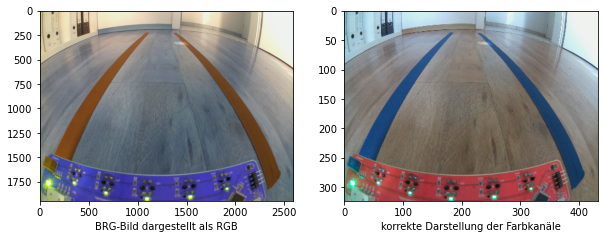

In [28]:
# Alternative: Anzeige mit matplotlib

import matplotlib.pylab as plt
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img) # Erwartet die Farbkanäle in der Reihenfolge Rot,Grün,Blau
plt.xlabel('BRG-Bild dargestellt als RGB')
plt.subplot(122)
img_rgb = cv.cvtColor(image_small_2, cv.COLOR_BGR2RGB) # Ändern der Farbkanäle BGR->RGB
plt.imshow(img_rgb)
plt.xlabel('korrekte Darstellung der Farbkanäle')

#### Vollbild mit PIL

(432, 324) RGB


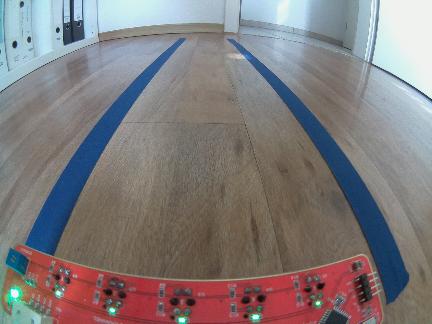

In [10]:
# Alternative: Anzeige mit PIL
from PIL import Image
image_rgb=Image.fromarray(img_rgb) #Erwartet RGB
print(image_rgb.size,image_rgb.mode)
display(image_rgb)

#### Graustufen aus BGR-Bild

(324, 432)


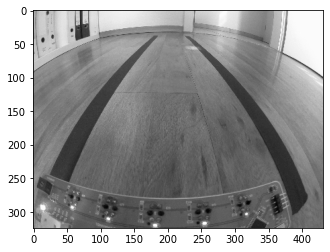

In [12]:
# Erstellung eines Graustufen bildes
img_gray = cv.cvtColor(image_small_2, cv.COLOR_BGR2GRAY)
print(img_gray.shape) # Array ist nun nur 2-dimensional
plt.imshow(img_gray,cmap='gray')

#### Farbkanäle
`cv.split, cv.merge, cv.cvtColor, cv.putText`

#####  - Zerlegen der Farbkanäle in 3 Numpy-Arrays
`cv.split, cv.merge`

(324, 432)
(324, 432)


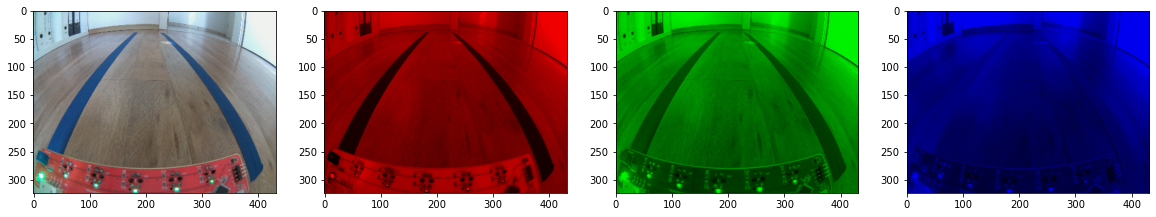

In [14]:
# Zerlegen in einzelne Farbkanäle 
r,g,b = cv.split(img_rgb)

# Beispielhaft Darstellung
print(img_rgb.shape[:2])
zeros = np.zeros(img_rgb.shape[:2], dtype="uint8")
print(zeros.shape)
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.imshow(img_rgb)
plt.subplot(142)
plt.imshow(cv.merge([r, zeros, zeros])) # Zusammenführen einzelnen Farbkanäle
plt.subplot(143)
plt.imshow(cv.merge([zeros, g, zeros]))
plt.subplot(144)
plt.imshow(cv.merge([zeros, zeros, b]))

##### - Konvertiern in anderen Farbraum: BGR->HSV
`cv.cvtColor, cv.putText`

Im Farbraum HSV kann das Filtern nach eine bestimmten Farbe einfacher sein!
(siehe auch [https://de.wikipedia.org/wiki/HSV-Farbraum](https://de.wikipedia.org/wiki/HSV-Farbraum))


Text(0.5, 0, 'Hellwert in Graustufen')

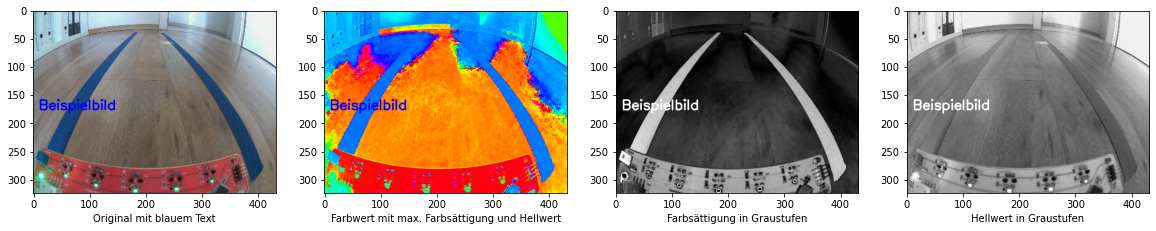

In [17]:
# Ändern des Farbraums BGR->HSV
img_hsv = cv.cvtColor(image_small_2, cv.COLOR_BGR2HSV)

# Fügt Text in Blau hinzu
cv.putText(img_hsv, 
        text = 'Beispielbild',
        org=(10,175), # Position
        fontFace= cv.FONT_HERSHEY_SIMPLEX,
        fontScale = .8, # Font size
        color = (120,255,255), # Color in hsv
        thickness = 2)

h,v,s = cv.split(img_hsv) # Aufteilen der Farbkanäle
# h Farbwert (hue)
# s Farbsättigung (saturation)
# v Hellwert (value)
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.imshow(cv.cvtColor(img_hsv, cv.COLOR_HSV2RGB))
plt.xlabel('Original mit blauem Text')
plt.subplot(142)
plt.imshow(cv.cvtColor(cv.merge([h, zeros+255, zeros+255]), cv.COLOR_HSV2RGB))
plt.xlabel('Farbwert mit max. Farbsättigung und Hellwert')
plt.subplot(143)
plt.imshow(v,cmap='gray')
plt.xlabel('Farbsättigung in Graustufen')
plt.subplot(144)
plt.imshow(s,cmap='gray')
plt.xlabel('Hellwert in Graustufen')

#### Erstellen einer Farbmaske
`cv.inRange`, `cv.threshold`

Die Mask stellt alle Bildpunkte, welche ein Filterkriterium bzgl der Farbe erfüllen z.B. weiß dar. Es können Strukturen eines bestimmten Farbbereichs erfasst werden. Die Mask selbst stellt ebenfalls ein Bild dar!

[https://docs.opencv.org/3.4/da/d97/tutorial_threshold_inRange.html](https://docs.opencv.org/3.4/da/d97/tutorial_threshold_inRange.html)

[https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html](https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

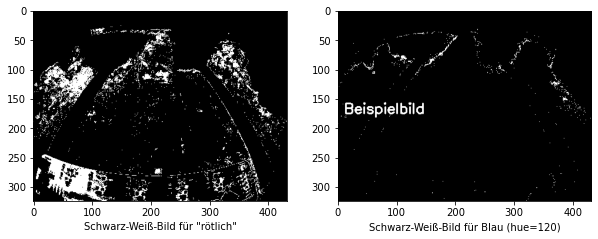

In [18]:
# Ober- und Untergrenze für Farbfiltern
lower = np.array([120, 0, 0])
upper = np.array([120, 255, 255])
mask = cv.inRange(img_hsv, lower, upper) # mask ist Numpy-Array
lower = np.array([0, 0, 0])
upper = np.array([12, 255, 255])
mask2 = cv.inRange(img_hsv, lower, upper) # mask ist Numpy-Array

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(mask2,cmap='gray')
plt.xlabel('Schwarz-Weiß-Bild für "rötlich"')
plt.subplot(122)
plt.imshow(mask,cmap='gray')
plt.xlabel('Schwarz-Weiß-Bild für Blau (hue=120)')
mask

Text(0.5, 0, 'invertierte Mask mit threshold 100')

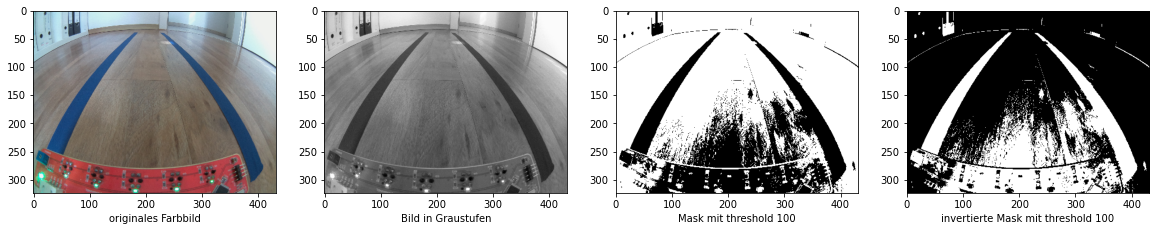

In [19]:
# Alternative: Für Graustufen
threshold=100
ret,img_th = cv.threshold(img_gray,threshold,1,cv.THRESH_BINARY)   # gibt threshold und Resultat zurück
ret,img_th2 = cv.threshold(img_gray,threshold,1,cv.THRESH_BINARY_INV)
plt.figure(figsize=(20,10))
plt.subplot(141)
plt.imshow(img_rgb)
plt.xlabel('originales Farbbild')
plt.subplot(142)
plt.imshow(img_gray,cmap='gray')
plt.xlabel('Bild in Graustufen')
plt.subplot(143)
plt.imshow(img_th,cmap='gray')
plt.xlabel('Mask mit threshold '+str(threshold))
plt.subplot(144)
plt.imshow(img_th2,cmap='gray')
plt.xlabel('invertierte Mask mit threshold '+str(threshold))

#### Glätten (smoothing)
`cv.blur, cv.addWeighted`

Text(0.5, 0, 'geglättetes Bild')

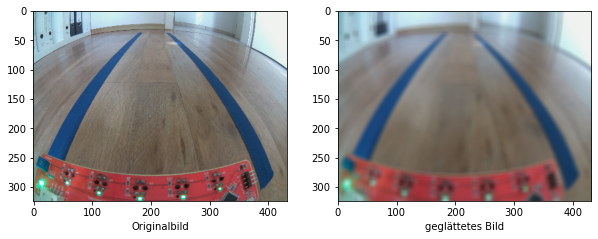

In [20]:
# Glätten
img_blur= cv.blur(img_rgb,(10,10))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img_rgb)
plt.xlabel('Originalbild')
plt.subplot(122)
plt.imshow(img_blur)
plt.xlabel('geglättetes Bild')

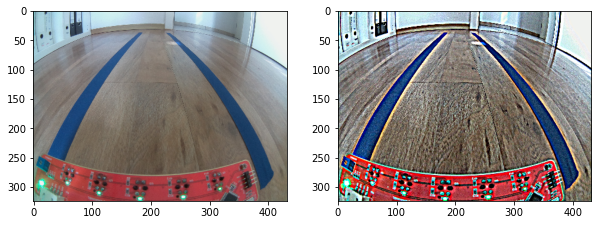

In [21]:
# Schärfen: durch Abzug des geglätteten Bild vom Original
img_blur2= cv.blur(img_rgb,(10,10))
img_sharp = cv.addWeighted(img_rgb,6,img_blur,-5,0)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img_rgb)
plt.subplot(122)
plt.imshow(img_sharp)

#### Kantenerkennung mit Canny-Edge-Detection
`cv.Canny(image,minVal,maxVal)`

Einer der verbreitesten und bewährtesten Algorithmen zur Kantenerkennung ist der Canny-Algorithmus [https://de.wikipedia.org/wiki/Canny-Algorithmus](https://de.wikipedia.org/wiki/Canny-Algorithmus). Dieser Algorithmus besitzt zwei wichtige Paramter `minVal`und `maxVal`. Eine Kante entsteht durch einen hohen Kontrast im Bild. Je höher dieser Kontrast desto höher die Kantenstärke an diesem Bildpunkt. Alle Punkte deren Kantenstärke größer ist als `maxVal` werden als "sichere" Kante erkannt. Alle Punkte deren Kantenstärke kleiner ist als `minVal`werden nicht als Kante erkannt. Alle Werte zwischen `minVal`und `maxVal` werden nur als Kante erkannt, wenn diese mit über andere Kanten mit einer"sicheren" Kante verbunden sind. (Glätten reduziert die Kantenstärke!)

Text(0.5, 0, 'Kanten mit Stärke > min Val')

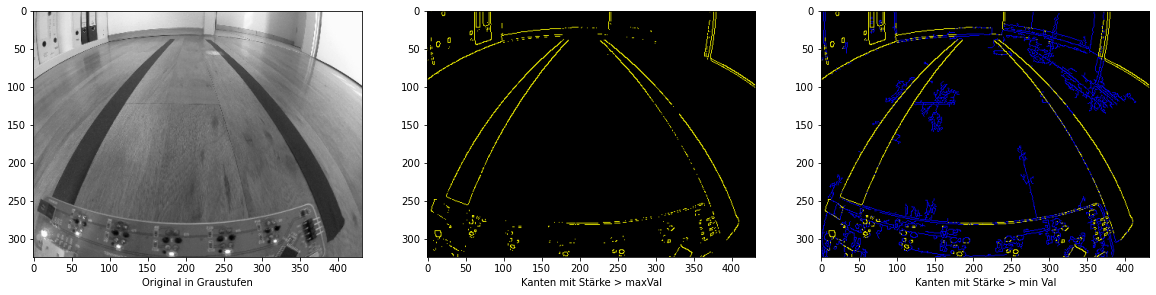

In [24]:
maxVal=250
minVal=20

# Eigene Werte
# maxVal=175
# minVal=20

img_c1 = cv.Canny(img_gray,maxVal,maxVal)
img_c2 = cv.Canny(img_gray,minVal,maxVal)

# Beispiel:
zeros = np.zeros(img_rgb.shape[:2], dtype="uint8")
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.imshow(img_gray,cmap='gray')
plt.xlabel('Original in Graustufen')
plt.subplot(132)
img_c1_color = cv.merge([img_c1,img_c1,zeros])
plt.imshow(img_c1_color)#,cmap='gray')
plt.xlabel('Kanten mit Stärke > maxVal')
plt.subplot(133)
img_c2_color = cv.merge([zeros,zeros,img_c2])
_,mask=cv.threshold(img_c1,200,255,cv.THRESH_BINARY_INV)
img_both = cv.add(cv.bitwise_or(img_c1_color,img_c2_color,mask = mask),img_c1_color)
plt.imshow(img_both,cmap='gray')
plt.xlabel('Kanten mit Stärke > min Val')

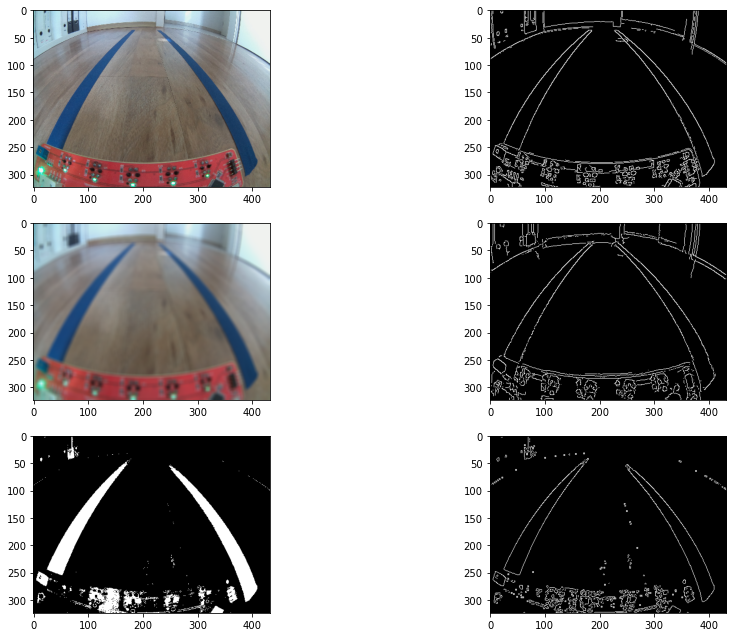

In [33]:
image_blur= cv.blur(img_rgb,(8,8))

#lower = np.array([240, 240, 240])
#upper = np.array([255, 255, 255])
# Eigene Werte
lower = np.array([55, 55, 55])
upper = np.array([255, 255, 255])

#image_mask = cv.inRange(image, lower, upper)
image_mask = cv.inRange(img_rgb, lower, upper)
image_mask = cv.bitwise_not(image_mask)

plt.figure(figsize=(15,15))
plt.subplot(421)
#plt.imshow(image)
plt.imshow(img_rgb)
plt.subplot(422)
#plt.imshow(cv.Canny(image,0,20),cmap='gray')
plt.imshow(cv.Canny(img_rgb,150,250),cmap='gray') # Eigener Wert
plt.subplot(423)
plt.imshow(image_blur,cmap='gray')
plt.subplot(424)
#plt.imshow(cv.Canny(image_blur,10,50),cmap='gray')
plt.imshow(cv.Canny(image_blur,15,60),cmap='gray') # Eigener Wert
plt.subplot(425)
plt.imshow(image_mask,cmap='gray')
plt.subplot(426)
#image_edges = cv.Canny(image_mask,440,450)
image_edges = cv.Canny(image_mask,440,450) # Eigener Wert
plt.imshow(image_edges,cmap='gray')

#### Erkennung von Geraden mittels Hough-Transformation
`cv.HoughLines(image_mask, rho, angle, min_threshold)`,

Die Hogh-Transformation dient u.a. zur Erkennung von Gerade in Schwarz-Weiß-Bilder z.b. nach einer Kantenerkennung.
Vereinfacht betrachte wird überprüft wie viele Kantenpunkte auf einer poteniellen Gerade liegen (`min_threshold`).

[https://de.wikipedia.org/wiki/Hough-Transformation](https://de.wikipedia.org/wiki/Hough-Transformation)

OpenCV implementiert zwei Versionen der Hough-Transformation - die klassische und die probabilistische.
- Die klassische Hough-Transformation gibt die Paramter "rho" und "angle" zurück, welche in Gerade umgerechnet werden müssen (siehe Beispilcode).
- Die probabilistische Hough-Transformation gibt Liniensegment zurück. Diese Stellen den Anfangs- und den Endpunkt der Linien dar.

[https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html](https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html)

In [34]:
# Klassische Hough-Transformation
#image_mask = cv.inRange(image, lower, upper)
image_mask = cv.inRange(img_rgb, lower, upper)
image_mask = cv.bitwise_not(image_mask)
image_mask = image_mask[0:250, :]

rho = 1  # distance precision in pixel, i.e. 1 pixel
angle = np.pi / 180  # angular precision in radian, i.e. 1 degree
#min_threshold = 10  # minimal of votes, Je geringer Min_threshold, dest mehr Geraden werden erkannt.
min_threshold = 40  # Eigener Wert

parameter_mask = cv.HoughLines(image_mask, rho, angle, min_threshold)
print(parameter_mask.shape)
parameter_mask[:2]

(1878, 1, 2)


array([[[167.        ,   0.62831855]],

       [[165.        ,   0.61086524]]], dtype=float32)

(65, 1, 2)
[[[167.           0.62831855]]

 [[165.           0.61086524]]]
len line segs: 65


Text(0.5, 0, 'Hough-Transformation von Bild links')

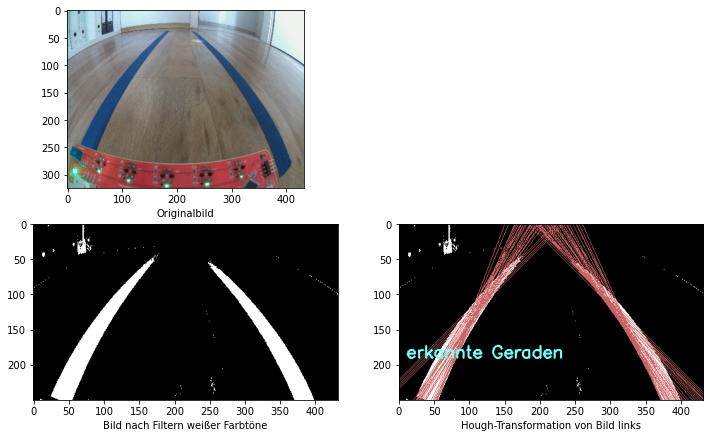

In [40]:
def draw_lines(parameter_mask,img):
    img2 = img.copy()
    img2 = cv.cvtColor(img2, cv.COLOR_GRAY2RGB)
    for line in parameter_mask:
        rho,theta = line[0]
        if theta == 0:
            continue
        a = -np.cos(theta)/np.sin(theta) # Anstieg der Gerade
        b = rho/np.sin(theta)            # Absolutglied/Intercept/Schnittpunkt mit der y-Achse
        x1 = 0
        y1 = int(b)
        x2 = 1000
        y2 = int(a*1000+b)
        #print(x1,x2,y1,y2)
        img2=cv.line(img2,(x1,y1),(x2,y2),(200,100,100),1) # adds a line to an image
        cv.putText(img2, 
            text = 'erkannte Geraden',
            org=(10,190), # Position
            fontFace= cv.FONT_HERSHEY_SIMPLEX,
            fontScale = .8, # Font size
            color = (120,255,255), # Color in hsv
            thickness = 2)
    return img2

# Eigene Anpassungen
image_mask = cv.inRange(img_rgb, lower, upper)
image_mask = cv.bitwise_not(image_mask)
image_mask = image_mask[0:250, :] # Entfernt IR aus Bildausschnitt

rho = 1  # distance precision in pixel, i.e. 1 pixel
angle = np.pi / 180  # angular precision in radian, i.e. 1 degree

#min_threshold = 65  # minimal of votes
min_threshold = 150  # Eigener Wert

parameter_mask = cv.HoughLines(image_mask, rho, angle, min_threshold)
print(parameter_mask.shape)
print(parameter_mask[:2])

print('len line segs:',len(parameter_mask))
image_mask_ls=draw_lines(parameter_mask,image_mask)

plt.figure(figsize=(12,15))
plt.subplot(421)
#plt.imshow(image)
plt.imshow(img_rgb)
plt.xlabel('Originalbild')
plt.subplot(423)
plt.imshow(image_mask,cmap='gray')
plt.xlabel('Bild nach Filtern weißer Farbtöne')
plt.subplot(424)
plt.imshow(image_mask_ls,cmap='gray')
plt.xlabel('Hough-Transformation von Bild links')

len line segs: 18


Text(0.5, 0, 'Hough-Transformation von Bild links')

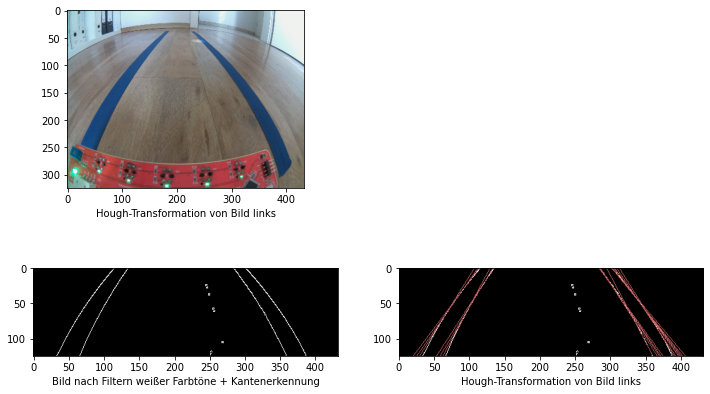

In [41]:
def draw_lines(parameter_mask,img):
    img2 = img.copy()
    img2 = cv.cvtColor(img2, cv.COLOR_GRAY2RGB)
    for line in parameter_mask:
        rho,theta = line[0]
        
        # Eigene Anpassung
        if theta == 0:
            continue
            
        a = -np.cos(theta)/np.sin(theta) # Anstieg der Gerade
        b = rho/np.sin(theta)            # Absolutglied/Intercept/Schnittpunkt mit der y-Achse
        x1 = 0
        y1 = int(b)
        x2 = 1000
        y2 = int(a*1000+b)
        #print(x1,x2,y1,y2)
        img2=cv.line(img2,(x1,y1),(x2,y2),(200,100,100),1) # adds a line to an image
        cv.putText(img2, 
            text = 'erkannte Geraden',
            org=(10,190), # Position
            fontFace= cv.FONT_HERSHEY_SIMPLEX,
            fontScale = .8, # Font size
            color = (120,255,255), # Color in hsv
            thickness = 2)
    return img2

# Eigene Anpassungen
image_mask = cv.inRange(img_rgb, lower, upper)
image_mask = cv.bitwise_not(image_mask)
#image_mask = image_mask[0:250, :]
image_mask = image_mask[100:225, :]

rho = 1  # distance precision in pixel, i.e. 1 pixel
angle = np.pi / 180  # angular precision in radian, i.e. 1 degree
#min_threshold = 65  # minimal of votes
min_threshold = 50  # Eigener Wert

image_edges = cv.Canny(image_mask,200,400)
parameter_edges = cv.HoughLines(image_edges, rho, angle, min_threshold)
print('len line segs:',len(parameter_edges))
image_edges_ls=draw_lines(parameter_edges,image_edges)

plt.figure(figsize=(12,15))
plt.subplot(421)
plt.imshow(img_rgb)
plt.xlabel('Originalbild')
plt.xlabel('Hough-Transformation von Bild links')
plt.subplot(423)
plt.imshow(image_edges,cmap='gray')
plt.xlabel('Bild nach Filtern weißer Farbtöne + Kantenerkennung')
plt.subplot(424)
plt.imshow(image_edges_ls,cmap='gray')
plt.xlabel('Hough-Transformation von Bild links')

In [42]:
# Probabilistische Hough-Transformation
# Eigene Anpassungen
image_mask = cv.inRange(img_rgb, lower, upper)
image_mask = cv.bitwise_not(image_mask)
#image_mask = image_mask[0:250, :]
image_mask = image_mask[100:225, :]

image_edges = cv.Canny(image_mask,200,400)
rho = 1              # distance precision in pixel, i.e. 1 pixel
angle = np.pi / 180  # angular precision in radian, i.e. 1 degree
min_threshold = 10   # in etwas Anzal der Punkt auf der Geraden. Je geringer Min_threshold, dest mehr Geraden werden erkannt.
minLineLength = 8    # Minimale Linienlänge
maxLineGap = 4       # Maximale Anzahl von Lücken in der Linie

line_segments = cv.HoughLinesP(image_mask, rho, angle, min_threshold, np.array([]), minLineLength=minLineLength, maxLineGap=maxLineGap)
print(line_segments.shape)
# Elemente stellen Punkte des Liniensegmentes dar (x1,y1,x2,y2)
line_segments[:2]

(62, 1, 4)


array([[[ 42, 124, 120,   0]],

       [[292,   0, 364, 124]]], dtype=int32)

Anzahl der Liniensegmente Parametersatz 1: 17
Anzahl der Liniensegmente Parametersatz 2: 8


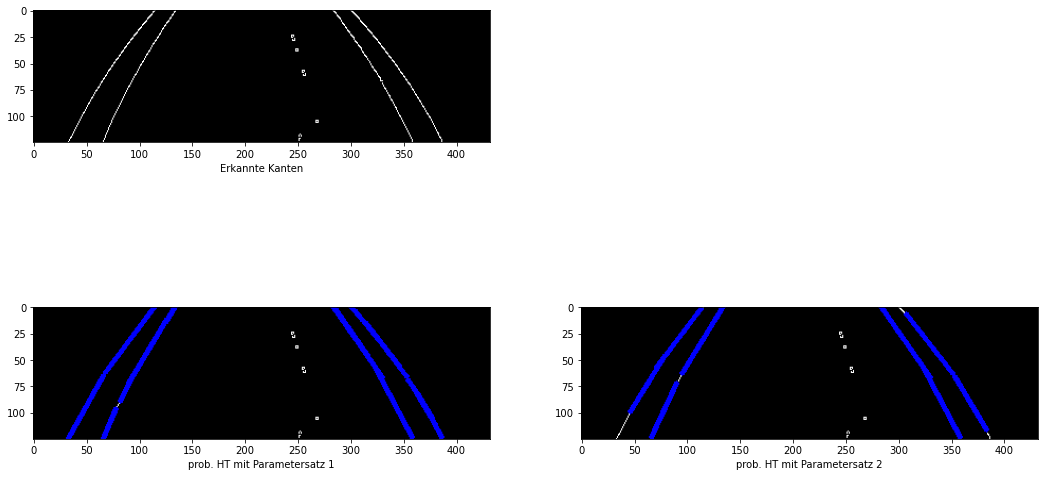

In [43]:
def draw_line_segments(line_segments,img):
    img2 = img.copy()
    img2 = cv.cvtColor(img2, cv.COLOR_GRAY2RGB)
    for line in line_segments:
        x1,y1,x2,y2 = line[0]
        cv.line(img2,(x1,y1),(x2,y2),(0,0,255),4)
    return img2

rho = 1              # distance precision in pixel, i.e. 1 pixel
angle = np.pi / 180  # angular precision in radian, i.e. 1 degree
min_threshold = 20   # in etwas Anzal der Punkt auf der Geraden. Je geringer Min_threshold, dest mehr Geraden werden erkannt.
#minLineLength = 8    # Minimale Linienlänge
minLineLength = 10    # Eigener Wert
maxLineGap = 4       # Maximale Anzahl von Lücken in der Linie

line_segments = cv.HoughLinesP(image_edges, rho, angle, min_threshold, np.array([]), minLineLength=minLineLength, maxLineGap=maxLineGap)
image_edges_ls = draw_line_segments(line_segments,image_edges)
print('Anzahl der Liniensegmente Parametersatz 1:',len(line_segments))

plt.figure(figsize=(18,10))
plt.subplot(221)
plt.imshow(image_edges,cmap='gray')
plt.xlabel('Erkannte Kanten')
plt.subplot(223)
plt.imshow(image_edges_ls)
plt.xlabel('prob. HT mit Parametersatz 1')

#min_threshold = 100   # in etwas Anzal der Punkt auf der Geraden. Je geringer Min_threshold, dest mehr Geraden werden erkannt.
#minLineLength = 100   # Minimale Linienlänge
# Eigene Werte
min_threshold = 40   # in etwas Anzal der Punkt auf der Geraden. Je geringer Min_threshold, dest mehr Geraden werden erkannt.
minLineLength = 40   # Minimale Linienlänge
maxLineGap = 10     # Maximale Anzahl von Lücken in der Linie
line_segments2 = cv.HoughLinesP(image_edges, rho, angle, min_threshold, np.array([]), minLineLength=minLineLength, maxLineGap=maxLineGap)
image_edges_ls2 = draw_line_segments(line_segments2,image_edges)
print('Anzahl der Liniensegmente Parametersatz 2:',len(line_segments2))
plt.subplot(224)
plt.imshow(image_edges_ls2)
plt.xlabel('prob. HT mit Parametersatz 2')
plt.show()

#### Spiegeln
`cv.flip`

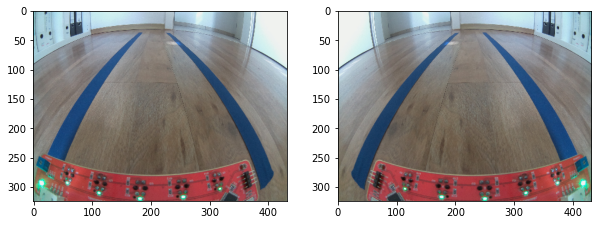

In [44]:
img_flip= cv.flip(img_rgb,1)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img_rgb)
plt.subplot(122)
plt.imshow(img_flip)

#### Blenden
`cv.addWeighted`

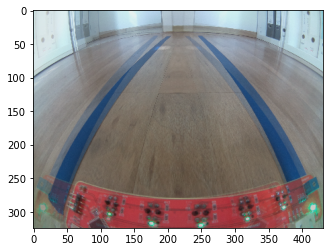

In [45]:
img_blended = cv.addWeighted(img_flip,.7,img_rgb,.3,0)
plt.imshow(img_blended)

#### Resampling
`cv.resize`

(324, 432, 3)
(50, 65, 3)


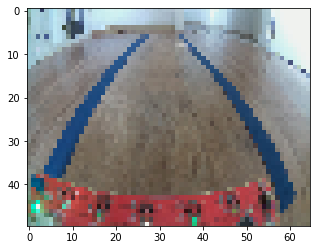

In [46]:
print(img_rgb.shape)
height, width, _ = img_rgb.shape
img_small = cv.resize(img_rgb,(65, 50), interpolation = cv.INTER_CUBIC)
print(img_small.shape)
plt.imshow(img_small)

##### Demo: Farbfilter HSV-Farbraum

In [48]:
import cv2
import sys
import numpy as np

def hsv_helper(img):
    def nothing(x):
        pass
    # Create a window
    window_id='Press q to quit'
    cv2.namedWindow(window_id)
    # create trackbars for color change
    cv2.createTrackbar('HMin',window_id,0,255,nothing) # Hue is from 0-179 for Opencv
    cv2.createTrackbar('SMin',window_id,0,255,nothing)
    cv2.createTrackbar('VMin',window_id,0,255,nothing)
    cv2.createTrackbar('HMax',window_id,0,255,nothing)
    cv2.createTrackbar('SMax',window_id,0,255,nothing)
    cv2.createTrackbar('VMax',window_id,0,255,nothing)
    # Set default value for MAX HSV trackbars.
    cv2.setTrackbarPos('HMax', window_id, 255)
    cv2.setTrackbarPos('SMax', window_id, 255)
    cv2.setTrackbarPos('VMax', window_id, 255)
    # Initialize to check if HSV min/max value changes
    hMin = sMin = vMin = hMax = sMax = vMax = 0

    output = img
    while(1):
        # get current positions of all trackbars
        hMin = cv2.getTrackbarPos('HMin',window_id)
        sMin = cv2.getTrackbarPos('SMin',window_id)
        vMin = cv2.getTrackbarPos('VMin',window_id)
        hMax = cv2.getTrackbarPos('HMax',window_id)
        sMax = cv2.getTrackbarPos('SMax',window_id)
        vMax = cv2.getTrackbarPos('VMax',window_id)
        # Set minimum and max HSV values to display
        lower = np.array([hMin, sMin, vMin])
        upper = np.array([hMax, sMax, vMax])
        # Create HSV Image and threshold into a range.
        hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        mask = cv2.inRange(hsv, lower, upper)
        output = cv2.bitwise_and(img,img, mask= mask)
        cv2.imshow(window_id,output)
        if cv2.waitKey(30) == ord('q'):
            break
    cv2.destroyAllWindows()

hsv_helper(image_small_2)

#### Demo: Filtern Graustufen

In [49]:
import cv2
import sys
import numpy as np


def graylevel_helper(img):
    def nothing(x):
        pass
    # Create a window
    window_id='Press q to quit'
    cv2.namedWindow(window_id)
    # create trackbars for color change
    cv2.createTrackbar('Max',window_id,0,255,nothing) # Hue is from 0-179 for Opencv
    cv2.createTrackbar('Min',window_id,0,255,nothing)
    # Set default value for MAX HSV trackbars.
    cv2.setTrackbarPos('Max', window_id, 255)
    # Initialize to check if HSV min/max value changes
    Min = Max = 0
    output = img
    while(1):

        # get current positions of all trackbars
        Min = cv2.getTrackbarPos('Min',window_id)
        Max = cv2.getTrackbarPos('Max',window_id)

        # Set minimum and max HSV values to display
        lower = np.array([Min])
        upper = np.array([Max])

        # Create HSV Image and threshold into a range.
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        mask = cv2.inRange(img_gray, lower, upper)
        img_mask = cv2.bitwise_and(img,img, mask= mask)
        img_gray_mask = cv2.bitwise_and(img_gray,img_gray, mask = mask)
        img_gray_mask_cs = cv2.cvtColor(img_gray_mask,cv2.COLOR_GRAY2BGR)
        mask_cs = cv2.cvtColor(mask,cv2.COLOR_GRAY2BGR)
        output = np.vstack((img_gray_mask_cs,img_mask,mask_cs))
        cv2.imshow(window_id,output)
        if cv2.waitKey(30) == ord('q'):
            break
    cv2.destroyAllWindows()

graylevel_helper(image_small_2)